In [1]:
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import BaggingRegressor

from warnings import filterwarnings
filterwarnings('ignore')

# KNN
## Model

In [2]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [3]:
knn_model = KNeighborsRegressor().fit(X_train, y_train)

In [4]:
knn_model

KNeighborsRegressor()

In [5]:
knn_model.n_neighbors

5

In [6]:
knn_model.effective_metric_

'euclidean'

## Tahmin

In [8]:
y_pred = knn_model.predict(X_test)

In [9]:
np.sqrt(mean_squared_error(y_test, y_pred))

426.6570764525201

In [10]:
RMSE = []

for k in range(10):
    k = k + 1
    knn_model = KNeighborsRegressor(n_neighbors = k).fit(X_train, y_train)
    y_pred = knn_model.predict(X_train)
    rmse = np.sqrt(mean_squared_error(y_train, y_pred))
    RMSE.append(rmse)
    print("k = ", k, "için RMSE değeri: ", rmse)

k =  1 için RMSE değeri:  0.0
k =  2 için RMSE değeri:  179.52761335480352
k =  3 için RMSE değeri:  205.20157172291863
k =  4 için RMSE değeri:  220.5139794876305
k =  5 için RMSE değeri:  239.64671325413764
k =  6 için RMSE değeri:  243.5904190007242
k =  7 için RMSE değeri:  258.1478781634636
k =  8 için RMSE değeri:  266.05374203349805
k =  9 için RMSE değeri:  269.73782093553376
k =  10 için RMSE değeri:  271.2798300436963


## Model Tuning

In [11]:
from sklearn.model_selection import GridSearchCV

In [12]:
knn_params = {"n_neighbors": np.arange(1,30,1)}

In [13]:
knn = KNeighborsRegressor()

In [14]:
knn_cv_model = GridSearchCV(knn, knn_params, cv = 10)

In [15]:
knn_cv_model.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])})

In [16]:
knn_cv_model.best_params_["n_neighbors"]

8

In [17]:
RMSE = [] 
RMSE_CV = []
for k in range(10):
    k = k+1
    knn_model = KNeighborsRegressor(n_neighbors = k).fit(X_train, y_train)
    y_pred = knn_model.predict(X_train) 
    rmse = np.sqrt(mean_squared_error(y_train,y_pred)) 
    rmse_cv = np.sqrt(-1*cross_val_score(knn_model, X_train, y_train, cv=10, 
                                         scoring = "neg_mean_squared_error").mean())
    RMSE.append(rmse) 
    RMSE_CV.append(rmse_cv)
    print("k =" , k , "için RMSE değeri: ", rmse, "RMSE_CV değeri: ", rmse_cv )

k = 1 için RMSE değeri:  0.0 RMSE_CV değeri:  325.39475147063825
k = 2 için RMSE değeri:  179.52761335480352 RMSE_CV değeri:  293.24000183333817
k = 3 için RMSE değeri:  205.20157172291863 RMSE_CV değeri:  283.7486667487823
k = 4 için RMSE değeri:  220.5139794876305 RMSE_CV değeri:  286.3240222024089
k = 5 için RMSE değeri:  239.64671325413764 RMSE_CV değeri:  290.0705466132226
k = 6 için RMSE değeri:  243.5904190007242 RMSE_CV değeri:  298.1263115575851
k = 7 için RMSE değeri:  258.1478781634636 RMSE_CV değeri:  294.77070479194987
k = 8 için RMSE değeri:  266.05374203349805 RMSE_CV değeri:  291.98672028891235
k = 9 için RMSE değeri:  269.73782093553376 RMSE_CV değeri:  295.7162739573105
k = 10 için RMSE değeri:  271.2798300436963 RMSE_CV değeri:  301.31047022701154


In [18]:
knn_tuned = KNeighborsRegressor(n_neighbors = knn_cv_model.best_params_["n_neighbors"])

In [20]:
knn_tuned.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=8)

In [21]:
np.sqrt(mean_squared_error(y_test, knn_tuned.predict(X_test)))

413.7094731463598

# Yapay sinir ağları

In [22]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [25]:
#tüm değişkenleri aynı ölçeğe scale etmek için kullanıyoruz.
from sklearn.preprocessing import StandardScaler

In [27]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [28]:
X_train_scaled = scaler.transform(X_train)

In [29]:
X_test_scaled = scaler.transform(X_test)

In [30]:
from sklearn.neural_network import MLPRegressor

In [31]:
mlp_model = MLPRegressor(hidden_layer_sizes = (100,20)).fit(X_train_scaled, y_train)

In [32]:
mlp_model

MLPRegressor(hidden_layer_sizes=(100, 20))

In [33]:
mlp_model.n_layers_

4

In [34]:
mlp_model.hidden_layer_sizes

(100, 20)

## Tahmin

In [35]:
y_pred = mlp_model.predict(X_test_scaled)

In [36]:
np.sqrt(mean_squared_error(y_test, y_pred))

490.451226965829

## Model Tuning

In [37]:
mlp_model

MLPRegressor(hidden_layer_sizes=(100, 20))

In [38]:
mlp_params = {'alpha': [0.1, 0.01,0.02,0.005],
             'hidden_layer_sizes': [(20,20),(100,50,150),(300,200,150)],
             'activation': ['relu','logistic']}

In [39]:
mlp_cv_model = GridSearchCV(mlp_model, mlp_params, cv = 10)

In [40]:
mlp_cv_model.fit(X_train_scaled, y_train)

GridSearchCV(cv=10, estimator=MLPRegressor(hidden_layer_sizes=(100, 20)),
             param_grid={'activation': ['relu', 'logistic'],
                         'alpha': [0.1, 0.01, 0.02, 0.005],
                         'hidden_layer_sizes': [(20, 20), (100, 50, 150),
                                                (300, 200, 150)]})

In [41]:
mlp_cv_model.best_params_

{'activation': 'relu', 'alpha': 0.01, 'hidden_layer_sizes': (100, 50, 150)}

In [42]:
mlp_tuned = MLPRegressor(alpha = 0.02, hidden_layer_sizes = (100,50,150))

In [43]:
mlp_tuned.fit(X_train_scaled, y_train)

MLPRegressor(alpha=0.02, hidden_layer_sizes=(100, 50, 150))

In [44]:
y_pred = mlp_tuned.predict(X_test_scaled)

In [45]:
np.sqrt(mean_squared_error(y_test, y_pred))

359.59059621062363

# CART

## Model

In [7]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [8]:
X_train = pd.DataFrame(X_train["Hits"])
X_test = pd.DataFrame(X_test["Hits"])

In [9]:
cart_model = DecisionTreeRegressor(min_samples_split = 2)

In [10]:
?cart_model

In [11]:
cart_model.fit(X_train, y_train)

DecisionTreeRegressor()

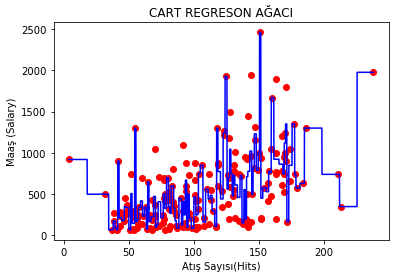

In [12]:
X_grid = np.arange(min(np.array(X_train)),max(np.array(X_train)), 0.01) 
X_grid = X_grid.reshape((len(X_grid), 1))  
plt.scatter(X_train, y_train, color = 'red') 
plt.plot(X_grid, cart_model.predict(X_grid), color = 'blue')  
plt.title('CART REGRESON AĞACI')  
plt.xlabel('Atış Sayısı(Hits)') 
plt.ylabel('Maaş (Salary)') ;

## Tahmin

In [29]:
cart_model.predict(X_test)[0:5]

array([ 725.    , 1230.    ,  725.    ,  504.1665,   67.5   ])

In [30]:
cart_model.predict([[91]])

array([125.])

In [31]:
y_pred =cart_model.predict(X_test)

In [32]:
np.sqrt(mean_squared_error(y_test, y_pred))

468.49579052913884

## Model Tuning

In [16]:
cart_model = DecisionTreeRegressor()

In [17]:
cart_model.fit(X_train, y_train)
y_pred = cart_model.predict(X_test)

In [18]:
np.sqrt(mean_squared_error(y_test, y_pred))

468.49579052913884

In [19]:
cart_params = {"min_samples_split": range(2,100),
               "max_leaf_nodes": range(2,10)}

In [20]:
cart_cv_model = GridSearchCV(cart_model, cart_params, cv = 10)

In [21]:
cart_cv_model.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(),
             param_grid={'max_leaf_nodes': range(2, 10),
                         'min_samples_split': range(2, 100)})

In [22]:
cart_cv_model.best_params_

{'max_leaf_nodes': 9, 'min_samples_split': 76}

In [23]:
cart_tuned = DecisionTreeRegressor(max_leaf_nodes = 9, min_samples_split = 37)

In [24]:
cart_tuned.fit(X_train, y_train)

DecisionTreeRegressor(max_leaf_nodes=9, min_samples_split=37)

In [25]:
y_pred = cart_tuned.predict(X_test)

In [26]:
np.sqrt(mean_squared_error(y_test, y_pred))

434.2326688144208

# Bagged Trees Regression

## Model

In [34]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [35]:
#özelliklerle oynamak için bu özelliği true yaptık
bag_model = BaggingRegressor(bootstrap_features = True)

In [43]:
bag_model = BaggingRegressor(bootstrap_features = True)
bag_model.fit(X_train, y_train)

BaggingRegressor(bootstrap_features=True)

In [44]:
bag_model.n_estimators

10

In [45]:
bag_model.estimators_

[DecisionTreeRegressor(random_state=749536862),
 DecisionTreeRegressor(random_state=1884645325),
 DecisionTreeRegressor(random_state=739766804),
 DecisionTreeRegressor(random_state=534656552),
 DecisionTreeRegressor(random_state=1182151440),
 DecisionTreeRegressor(random_state=1375356018),
 DecisionTreeRegressor(random_state=1021667007),
 DecisionTreeRegressor(random_state=28320127),
 DecisionTreeRegressor(random_state=1125441120),
 DecisionTreeRegressor(random_state=44666823)]

## Tahmin

In [48]:
y_pred = bag_model.predict(X_test)

In [49]:
np.sqrt(mean_squared_error(y_test, y_pred))

317.65764289537503

In [51]:
#ikinci ağacın performansına bakalım
iki_y_pred = bag_model.estimators_[1].fit(X_train, y_train).predict(X_test)

In [52]:
np.sqrt(mean_squared_error(y_test, iki_y_pred))

456.4187674832448

In [53]:
yedi_y_pred = bag_model.estimators_[6].fit(X_train, y_train).predict(X_test)

In [54]:
np.sqrt(mean_squared_error(y_test, yedi_y_pred))

446.63358223516076

## Model Tuning

In [56]:
bag_model = BaggingRegressor(bootstrap_features = True)
bag_model.fit(X_train, y_train)

BaggingRegressor(bootstrap_features=True)

In [57]:
bag_params = {"n_estimators": range(2,20)}

In [58]:
bag_cv_model = GridSearchCV(bag_model, bag_params, cv = 10)

In [59]:
bag_cv_model.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=BaggingRegressor(bootstrap_features=True),
             param_grid={'n_estimators': range(2, 20)})

In [60]:
bag_cv_model.best_params_

{'n_estimators': 18}

In [61]:
bag_tuned = BaggingRegressor( n_estimators = 18, random_state = 45)

In [62]:
bag_tuned.fit(X_train, y_train)

BaggingRegressor(n_estimators=18, random_state=45)

In [63]:
y_pred = bag_tuned.predict(X_test)

In [64]:
np.sqrt(mean_squared_error(y_test, y_pred))

340.8505108689462

# Random Forests

## Model

In [65]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [66]:
from sklearn.ensemble import RandomForestRegressor

In [67]:
rf_model = RandomForestRegressor(random_state = 42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

## Tahmin

In [68]:
rf_model.predict(X_test)[0:5]

array([ 740.62167,  895.99497, 1184.695  ,  139.65167,  634.75833])

In [69]:
y_pred = rf_model.predict(X_test)

In [70]:
np.sqrt(mean_squared_error(y_test, y_pred))

345.00286717448006

## Model Tuning

In [71]:
rf_params = {'max_depth': list(range(1,10)),
            'max_features': [3,5,10,15],
            'n_estimators' : [100, 200, 500, 1000, 2000]}

In [72]:
rf_model = RandomForestRegressor(random_state = 42)

In [ ]:
#!!!!!!!!!!!!!!!!!!!!!! ÇALIŞTIRMA !!!!!!!!!!!!!!!!!!!!!!
#n_jobs = -1 tüm işlemcilerin bu işlemi yapmasını sağlar.
rf_cv_model = GridSearchCV(rf_model, rf_params, cv = 10, n_jobs = -1)

In [ ]:
rf_cv_model.fit(X_train, y_train)
rf_cv_model.best_params_

In [73]:
rf_tuned = RandomForestRegressor(max_depth  = 8, 
                                 max_features = 3, 
                                 n_estimators =200)

In [74]:
rf_tuned.fit(X_train, y_train)

RandomForestRegressor(max_depth=8, max_features=3, n_estimators=200)

In [75]:
y_pred = rf_tuned.predict(X_test)

In [76]:
np.sqrt(mean_squared_error(y_test, y_pred))

344.45879792393634

In [77]:
Importance = pd.DataFrame({"Importance": rf_tuned.feature_importances_*100},
                         index = X_train.columns)

Text(0.5, 0, 'Değişken Önem Düzeyleri')

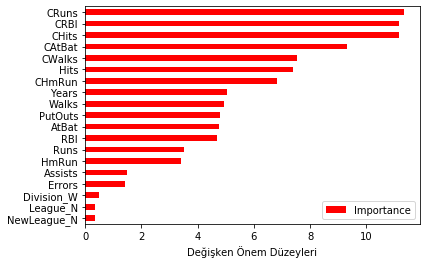

In [78]:
Importance.sort_values(by = "Importance", 
                       axis = 0, 
                       ascending = True).plot(kind ="barh", color = "r")

plt.xlabel("Değişken Önem Düzeyleri")

# Gradient Boosting Machines (GBM)

In [81]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [82]:
from sklearn.ensemble import GradientBoostingRegressor

In [83]:
gbm_model = GradientBoostingRegressor()
gbm_model.fit(X_train, y_train)

GradientBoostingRegressor()

## Tahmin

In [85]:
y_pred = gbm_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

360.6133994741548

## Model Tuning

In [86]:
gbm_params = {
    'learning_rate': [0.001, 0.01, 0.1, 0.2],
    'max_depth': [3, 5, 8,50,100],
    'n_estimators': [200, 500, 1000, 2000],
    'subsample': [1,0.5,0.75],
}

In [ ]:
# !!!!!!!!!!!!!!!! ÇALIŞTIRMA !!!!!!!!!!!!!!!
gbm = GradientBoostingRegressor()
gbm_cv_model = GridSearchCV(gbm, gbm_params, cv = 10, n_jobs = -1, verbose = 2)
gbm_cv_model.fit(X_train, y_train)

In [ ]:
gbm_cv_model.best_params_

In [87]:
gbm_tuned = GradientBoostingRegressor(learning_rate = 0.1,  
                                      max_depth = 5, 
                                      n_estimators = 200, 
                                      subsample = 0.5)

gbm_tuned = gbm_tuned.fit(X_train,y_train)

In [88]:
y_pred = gbm_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

344.280512901008

In [89]:
Importance = pd.DataFrame({"Importance": gbm_tuned.feature_importances_*100},
                         index = X_train.columns)

Text(0.5, 0, 'Değişken Önem Düzeyleri')

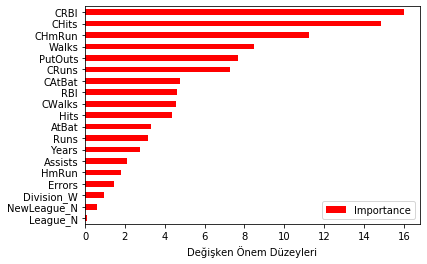

In [90]:
Importance.sort_values(by = "Importance", 
                       axis = 0, 
                       ascending = True).plot(kind ="barh", color = "r")

plt.xlabel("Değişken Önem Düzeyleri")

# XGBoost

In [91]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [92]:
!pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
--- Logging error ---
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/pip/_internal/utils/logging.py", line 177, in emit
    self.console.print(renderable, overflow="ignore", crop=False, style=style)
  File "/usr/local/lib/python3.8/dist-packages/pip/_vendor/rich/console.py", line 1752, in print
    extend(render(renderable, render_options))
  File "/usr/local/lib/python3.8/dist-packages/pip/_vendor/rich/console.py", line 1390, in render
    for render_output in iter_render:
  File "/usr/local/lib/python3.8/dist-packages/pip/_internal/utils/logging.py", line 134, in __rich_console__
    for line in lines:
  File "/usr/local/lib/python3.8/dist-packages/pip/_vendor/rich/segment.py", line 245, in split_lines
    for segment in segments:
  File "/usr/local/lib/python3.8/dist-packages/pip/_vendor/rich/console.py", line 1368, in render
    renderable = rich_cast(renderable)
  File 

In [93]:
import xgboost as xgb

In [94]:
from xgboost import XGBRegressor

In [95]:
xgb_model = XGBRegressor().fit(X_train, y_train)

## Tahmin

In [96]:
y_pred = xgb_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

355.46515176059927

## Model Tuning

In [97]:
xgb_model

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [98]:
xgb_grid = {
     'colsample_bytree': [0.4, 0.5,0.6,0.9,1], 
     'n_estimators':[100, 200, 500, 1000],
     'max_depth': [2,3,4,5,6],
     'learning_rate': [0.1, 0.01, 0.5]
}


In [ ]:
#!!!!!!!!!!!!!! ÇALIŞTIRMA !!!!!!!!!!!!!!!!
xgb = XGBRegressor()

xgb_cv = GridSearchCV(xgb, 
                      param_grid = xgb_grid, 
                      cv = 10, 
                      n_jobs = -1,
                      verbose = 2)

xgb_cv.fit(X_train, y_train)

In [99]:
xgb_tuned = XGBRegressor(colsample_bytree = 0.9, 
                         learning_rate = 0.01, 
                         max_depth = 5, 
                         n_estimators = 1000) 

xgb_tuned = xgb_tuned.fit(X_train,y_train)

In [100]:
y_pred = xgb_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

357.18507083923674

# Light GBM

In [101]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [102]:
!pip install lightgbm

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 1.0 MB/s eta 0:00:00m eta 0:00:010:00:010m
--- Logging error ---
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/pip/_internal/utils/logging.py", line 177, in emit
    self.console.print(renderable, overflow="ignore", crop=False, style=style)
  File "/usr/local/lib/python3.8/dist-packages/pip/_vendor/rich/console.py", line 1752, in print
    extend(render(renderable, render_options))
  File "/usr/local/lib/python3.8/dist-packages/pip/_vendor/rich/console.py", line 1390, in render
    for render_output in iter_render:
  File "/usr/local/lib/python3.8/dist-packages/pip/_internal/utils/logging.py", line 134, in __rich_console__
    for line in lines:
  File "/usr/local/lib/python3.8/dist-packages/pip/_vendor/rich/segment.py", line 245, in split_lines
    for segment in segments:
  File "/usr/local/lib/python3.8/dist-packag

In [103]:
from lightgbm import LGBMRegressor

In [105]:
lgbm = LGBMRegressor()
lgbm_model = lgbm.fit(X_train, y_train)

## Tahmin

In [106]:
y_pred = lgbm_model.predict(X_test, 
                            num_iteration = lgbm_model.best_iteration_)

In [107]:
np.sqrt(mean_squared_error(y_test, y_pred))

363.8712087611089

## Model Tuning

In [108]:
lgbm_model

LGBMRegressor()

In [109]:
lgbm_grid = {
    'colsample_bytree': [0.4, 0.5,0.6,0.9,1],
    'learning_rate': [0.01, 0.1, 0.5,1],
    'n_estimators': [20, 40, 100, 200, 500,1000],
    'max_depth': [1,2,3,4,5,6,7,8] }


In [110]:
lgbm = LGBMRegressor()

In [ ]:
# !!!!!!!!!!!!!! ÇALIŞTIRMA !!!!!!!!!!!!!!!!
lgbm_cv_model = GridSearchCV(lgbm, lgbm_grid, cv=10, n_jobs = -1, verbose = 2)

In [111]:
lgbm_tuned = LGBMRegressor(learning_rate = 0.1, 
                           max_depth = 7, 
                           n_estimators = 40,
                          colsample_bytree = 0.6)

lgbm_tuned = lgbm_tuned.fit(X_train,y_train)

In [112]:
y_pred = lgbm_tuned.predict(X_test)

In [113]:
np.sqrt(mean_squared_error(y_test, y_pred))

372.7342551250238

# CatBoost

In [114]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [115]:
!pip install catboost

Defaulting to user installation because normal site-packages is not writeable
--- Logging error ---
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/pip/_internal/utils/logging.py", line 177, in emit
    self.console.print(renderable, overflow="ignore", crop=False, style=style)
  File "/usr/local/lib/python3.8/dist-packages/pip/_vendor/rich/console.py", line 1752, in print
    extend(render(renderable, render_options))
  File "/usr/local/lib/python3.8/dist-packages/pip/_vendor/rich/console.py", line 1390, in render
    for render_output in iter_render:
  File "/usr/local/lib/python3.8/dist-packages/pip/_internal/utils/logging.py", line 134, in __rich_console__
    for line in lines:
  File "/usr/local/lib/python3.8/dist-packages/pip/_vendor/rich/segment.py", line 245, in split_lines
    for segment in segments:
  File "/usr/local/lib/python3.8/dist-packages/pip/_vendor/rich/console.py", line 1368, in render
    renderable = rich_cast(renderable)
  File 

In [116]:
from catboost import CatBoostRegressor

In [117]:
catb = CatBoostRegressor()
catb_model = catb.fit(X_train, y_train)

Learning rate set to 0.031674
0:	learn: 437.6430699	total: 49.3ms	remaining: 49.3s
1:	learn: 431.3923642	total: 50ms	remaining: 25s
2:	learn: 424.8820360	total: 50.6ms	remaining: 16.8s
3:	learn: 418.2514904	total: 51.2ms	remaining: 12.7s
4:	learn: 412.6394021	total: 52ms	remaining: 10.3s
5:	learn: 406.6247020	total: 52.5ms	remaining: 8.7s
6:	learn: 400.5321206	total: 53.1ms	remaining: 7.53s
7:	learn: 394.6683437	total: 53.6ms	remaining: 6.65s
8:	learn: 388.2496484	total: 54.1ms	remaining: 5.96s
9:	learn: 382.9448842	total: 54.7ms	remaining: 5.42s
10:	learn: 377.2600080	total: 55.4ms	remaining: 4.98s
11:	learn: 372.4829606	total: 56ms	remaining: 4.61s
12:	learn: 366.6823437	total: 56.6ms	remaining: 4.29s
13:	learn: 362.6076230	total: 57ms	remaining: 4.02s
14:	learn: 358.0107745	total: 57.5ms	remaining: 3.77s
15:	learn: 353.2802665	total: 58ms	remaining: 3.57s
16:	learn: 348.5646265	total: 58.6ms	remaining: 3.39s
17:	learn: 343.6407912	total: 59.4ms	remaining: 3.24s
18:	learn: 339.236384

259:	learn: 104.5887628	total: 185ms	remaining: 527ms
260:	learn: 104.1305873	total: 186ms	remaining: 526ms
261:	learn: 103.5527158	total: 186ms	remaining: 525ms
262:	learn: 103.0334823	total: 187ms	remaining: 523ms
263:	learn: 102.6732388	total: 187ms	remaining: 523ms
264:	learn: 102.4678728	total: 188ms	remaining: 522ms
265:	learn: 101.9608852	total: 189ms	remaining: 520ms
266:	learn: 101.4449668	total: 189ms	remaining: 519ms
267:	learn: 100.9647899	total: 190ms	remaining: 518ms
268:	learn: 100.4376357	total: 190ms	remaining: 517ms
269:	learn: 100.1038322	total: 191ms	remaining: 516ms
270:	learn: 99.8991183	total: 191ms	remaining: 515ms
271:	learn: 99.4016031	total: 192ms	remaining: 514ms
272:	learn: 98.9231252	total: 193ms	remaining: 513ms
273:	learn: 98.5734863	total: 193ms	remaining: 513ms
274:	learn: 98.3333355	total: 194ms	remaining: 512ms
275:	learn: 97.9164082	total: 195ms	remaining: 511ms
276:	learn: 97.3911203	total: 195ms	remaining: 510ms
277:	learn: 96.9317789	total: 196ms

591:	learn: 36.2539345	total: 370ms	remaining: 255ms
592:	learn: 36.2314399	total: 370ms	remaining: 254ms
593:	learn: 36.0683824	total: 371ms	remaining: 254ms
594:	learn: 35.9283095	total: 372ms	remaining: 253ms
595:	learn: 35.7968288	total: 372ms	remaining: 252ms
596:	learn: 35.7223423	total: 373ms	remaining: 252ms
597:	learn: 35.5848854	total: 373ms	remaining: 251ms
598:	learn: 35.4754344	total: 374ms	remaining: 250ms
599:	learn: 35.3533890	total: 374ms	remaining: 249ms
600:	learn: 35.2201505	total: 375ms	remaining: 249ms
601:	learn: 35.0873272	total: 375ms	remaining: 248ms
602:	learn: 35.0461873	total: 376ms	remaining: 247ms
603:	learn: 34.9273071	total: 376ms	remaining: 247ms
604:	learn: 34.8162855	total: 377ms	remaining: 246ms
605:	learn: 34.7130059	total: 377ms	remaining: 245ms
606:	learn: 34.5585617	total: 378ms	remaining: 245ms
607:	learn: 34.4611907	total: 378ms	remaining: 244ms
608:	learn: 34.4326546	total: 379ms	remaining: 243ms
609:	learn: 34.2846979	total: 379ms	remaining:

944:	learn: 13.3015250	total: 553ms	remaining: 32.2ms
945:	learn: 13.2587480	total: 554ms	remaining: 31.6ms
946:	learn: 13.1949436	total: 555ms	remaining: 31ms
947:	learn: 13.1552441	total: 555ms	remaining: 30.4ms
948:	learn: 13.0700947	total: 556ms	remaining: 29.9ms
949:	learn: 13.0460884	total: 556ms	remaining: 29.3ms
950:	learn: 13.0315972	total: 557ms	remaining: 28.7ms
951:	learn: 12.9964111	total: 558ms	remaining: 28.1ms
952:	learn: 12.9757139	total: 558ms	remaining: 27.5ms
953:	learn: 12.9120533	total: 559ms	remaining: 26.9ms
954:	learn: 12.8776679	total: 559ms	remaining: 26.4ms
955:	learn: 12.8703243	total: 560ms	remaining: 25.8ms
956:	learn: 12.8058615	total: 561ms	remaining: 25.2ms
957:	learn: 12.7637381	total: 561ms	remaining: 24.6ms
958:	learn: 12.7517063	total: 562ms	remaining: 24ms
959:	learn: 12.7382108	total: 562ms	remaining: 23.4ms
960:	learn: 12.6881713	total: 563ms	remaining: 22.8ms
961:	learn: 12.6728317	total: 563ms	remaining: 22.2ms
962:	learn: 12.6386609	total: 56

## Tahmin

In [118]:
y_pred = catb_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

351.194631344607

## Model Tuning

In [119]:
catb_grid = {
    'iterations': [200,500,1000,2000],
    'learning_rate': [0.01, 0.03, 0.05, 0.1],
    'depth': [3,4,5,6,7,8] }

In [120]:
catb = CatBoostRegressor()

In [ ]:
#!!!!!!!!!!!!!!!!! ÇALIŞTIRMA !!!!!!!!!!!!!!!!!!
catb_cv_model = GridSearchCV(catb, catb_grid, cv=5, n_jobs = -1, verbose = 2)

In [121]:
catb_tuned = CatBoostRegressor(iterations = 200, 
                               learning_rate = 0.01, 
                               depth = 8)

catb_tuned = catb_tuned.fit(X_train,y_train)

0:	learn: 442.4903140	total: 3.7ms	remaining: 736ms
1:	learn: 440.4621805	total: 5.73ms	remaining: 567ms
2:	learn: 438.5132091	total: 7.39ms	remaining: 485ms
3:	learn: 436.2180377	total: 9.04ms	remaining: 443ms
4:	learn: 434.0461579	total: 10.9ms	remaining: 425ms
5:	learn: 431.8437770	total: 12.9ms	remaining: 416ms
6:	learn: 430.1594587	total: 16.2ms	remaining: 448ms
7:	learn: 428.0941830	total: 19.8ms	remaining: 474ms
8:	learn: 426.0998774	total: 22.5ms	remaining: 478ms
9:	learn: 424.0249067	total: 22.9ms	remaining: 436ms
10:	learn: 422.1921868	total: 24.8ms	remaining: 426ms
11:	learn: 420.2506764	total: 27.6ms	remaining: 433ms
12:	learn: 418.3116383	total: 29.3ms	remaining: 421ms
13:	learn: 416.2966847	total: 30.9ms	remaining: 410ms
14:	learn: 414.5776175	total: 32.4ms	remaining: 400ms
15:	learn: 412.8009394	total: 34.1ms	remaining: 392ms
16:	learn: 410.9774146	total: 35.7ms	remaining: 384ms
17:	learn: 409.1047417	total: 37.5ms	remaining: 379ms
18:	learn: 407.6243957	total: 38.9ms	re

186:	learn: 228.2636690	total: 390ms	remaining: 27.1ms
187:	learn: 227.6023563	total: 396ms	remaining: 25.2ms
188:	learn: 227.0846972	total: 398ms	remaining: 23.2ms
189:	learn: 226.4545281	total: 400ms	remaining: 21ms
190:	learn: 225.8981660	total: 401ms	remaining: 18.9ms
191:	learn: 225.3663235	total: 404ms	remaining: 16.8ms
192:	learn: 224.7996893	total: 406ms	remaining: 14.7ms
193:	learn: 224.2439337	total: 408ms	remaining: 12.6ms
194:	learn: 223.6864443	total: 410ms	remaining: 10.5ms
195:	learn: 223.1405707	total: 411ms	remaining: 8.39ms
196:	learn: 222.4965559	total: 413ms	remaining: 6.29ms
197:	learn: 221.9452309	total: 415ms	remaining: 4.19ms
198:	learn: 221.4075421	total: 417ms	remaining: 2.1ms
199:	learn: 220.9138000	total: 423ms	remaining: 0us
